# Coefficient Analysis

In [1]:
# Imports:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


# Import PCA.


%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Import pre-imputed datatset 

df= pd.read_csv("../../data/pre_imputed.csv")
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
print(df.shape)

(13969, 117)


In [3]:
df.head(5)

,federal_provider_number,total_deaths_per_1000,total_cases_per_1000,2020_cases_per_1000,2020_deaths_per_1000,2021_cases_per_1000,2021_deaths_per_1000,provider_city,provider_zip_code,provider_county_name,number_of_certified_beds,average_number_of_residents_per_day,provider_resides_in_hospital,date_first_approved_to_provide_medicare_and_medicaid_services,continuing_care_retirement_community,abuse_icon,most_recent_health_inspection_more_than_2_years_ago,provider_changed_ownership_in_last_12_months,automatic_sprinkler_systems_in_all_required_areas,overall_rating,health_inspection_rating,qm_rating,staffing_rating,rn_staffing_rating,reported_nurse_aide_staffing_hours_per_resident_per_day,reported_lpn_staffing_hours_per_resident_per_day,reported_rn_staffing_hours_per_resident_per_day,reported_licensed_staffing_hours_per_resident_per_day,reported_total_nurse_staffing_hours_per_resident_per_day,reported_physical_therapist_staffing_hours_per_resident_per_day,adjusted_nurse_aide_staffing_hours_per_resident_per_day,adjusted_lpn_staffing_hours_per_resident_per_day,adjusted_rn_staffing_hours_per_resident_per_day,adjusted_total_nurse_staffing_hours_per_resident_per_day,total_weighted_health_survey_score,number_of_facility_reported_incidents,number_of_substantiated_complaints,number_of_citations_from_infection_control_inspections,number_of_fines,total_amount_of_fines_in_dollars,number_of_payment_denials,total_number_of_penalties,percent_vaccinated_residents,percent_vaccinated_healthcare_personnel,rural_versus_urban,overhead_non-salary_costs,total_charges,total_costs,wage-related_costs_(core),total_salaries_(adjusted),total_assets,accounts_payable,"salaries,_wages,_and_fees_payable",total_liabilities,total_fund_balances,total_general_inpatient_care_services_revenue,inpatient_revenue,gross_revenue,net_patient_revenue,less_total_operating_expense,net_income_from_service_to_patients,total_income,net_income,provider_state_ar,provider_state_az,provider_state_ca,provider_state_co,provider_state_ct,provider_state_de,provider_state_fl,provider_state_ga,provider_state_gu,provider_state_hi,provider_state_ia,provider_state_id,provider_state_il,provider_state_in,provider_state_ks,provider_state_ky,provider_state_la,provider_state_ma,provider_state_md,provider_state_me,provider_state_mi,provider_state_mn,provider_state_mo,provider_state_ms,provider_state_mt,provider_state_nc,provider_state_nd,provider_state_ne,provider_state_nj,provider_state_nm,provider_state_nv,provider_state_ny,provider_state_oh,provider_state_ok,provider_state_or,provider_state_pa,provider_state_pr,provider_state_ri,provider_state_sc,provider_state_sd,provider_state_tn,provider_state_tx,provider_state_ut,provider_state_va,provider_state_vt,provider_state_wa,provider_state_wi,provider_state_wv,provider_state_wy,ownership_type_government,ownership_type_non_profit,with_a_resident_and_family_council_family,with_a_resident_and_family_council_none,with_a_resident_and_family_council_resident
0,15009,188.68,1811.32,905.66,94.34,905.66,94.34,RUSSELLVILLE,35653,Franklin,57,53.2,0,1969,0,0,1,1,1.0,5.0,5.0,5.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.333,0,0,0.0,0,0.00,0,0,NaN,NaN,0.0,2151372.0,936818.0,610630.0,414202.0,2426400.0,1724846.0,89387.0,101599.0,184933.0,1539913.0,4395342.0,5332160.0,5332160.0,4727863.0,4601512.0,126351.0,135292.0,135292.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15010,59.11,571.40,295.08,32.79,276.32,26.32,SYLACAUGA,35150,Talladega,85,72.5,0,1967,0,0,1,1,1.0,4.0,3.0,4.0,5.0,5.0,2.69344,0.91942,0.90290,1.82232,4.51576,0.01307,2.82510,1.04987,1.27671,4.98569,18.667,0,0,0.0,1,650.00,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15012,190.47,698.42,392.86,107.14,305.56,83.33,SCOTTSBORO,35768,Jackson,50,40.3,1,1967,0,0,1,1,1.0,1.0,2.0,3.0,1.0,1.0,

In [4]:
## Add in new features and drop remaining outliers 

df["rating_exp"]=(df["overall_rating"]+df["health_inspection_rating"]+df["qm_rating"]+df["staffing_rating"]+df["rn_staffing_rating"])**2
df1= df.loc[df['total_deaths_per_1000'] <= 3500]
df1.shape

(13967, 118)

In [5]:
variables=[
#"federal_provider_number",
"total_deaths_per_1000",
#"total_cases_per_1000",
#"2020_cases_per_1000",
#"2020_deaths_per_1000",
#"2021_cases_per_1000",
#"2021_deaths_per_1000",
#"provider_city",
#"provider_zip_code",
#"provider_county_name",
"number_of_certified_beds",
"average_number_of_residents_per_day",
"provider_resides_in_hospital",
"date_first_approved_to_provide_medicare_and_medicaid_services",
"continuing_care_retirement_community",
"abuse_icon",
"most_recent_health_inspection_more_than_2_years_ago",
"provider_changed_ownership_in_last_12_months",
"automatic_sprinkler_systems_in_all_required_areas",
"overall_rating",
"health_inspection_rating",
"qm_rating",
"staffing_rating",
"rn_staffing_rating",
"reported_nurse_aide_staffing_hours_per_resident_per_day",
"reported_lpn_staffing_hours_per_resident_per_day","reported_rn_staffing_hours_per_resident_per_day",
"reported_licensed_staffing_hours_per_resident_per_day",
"reported_total_nurse_staffing_hours_per_resident_per_day",
"reported_physical_therapist_staffing_hours_per_resident_per_day",
"adjusted_nurse_aide_staffing_hours_per_resident_per_day",
"adjusted_lpn_staffing_hours_per_resident_per_day",
"adjusted_rn_staffing_hours_per_resident_per_day",
"adjusted_total_nurse_staffing_hours_per_resident_per_day",
"total_weighted_health_survey_score",
"number_of_facility_reported_incidents",
"number_of_substantiated_complaints",
"number_of_citations_from_infection_control_inspections",
"number_of_fines",
"total_amount_of_fines_in_dollars",
"number_of_payment_denials",
"total_number_of_penalties",
"percent_vaccinated_residents",
"percent_vaccinated_healthcare_personnel",
"rural_versus_urban",
#"overhead_non-salary_costs",
#"total_charges",
#"total_costs",
"wage-related_costs_(core)",
#"total_salaries_(adjusted)",
#"total_assets",
#"accounts_payable",
"salaries,_wages,_and_fees_payable",
"total_liabilities",
#"total_fund_balances",
#"total_general_inpatient_care_services_revenue",
#"inpatient_revenue",
#"gross_revenue",
"net_patient_revenue",
#"less_total_operating_expense",
"net_income_from_service_to_patients",
#"total_income",
"net_income",
"provider_state_ar",
"provider_state_az",
"provider_state_ca",
"provider_state_co",
"provider_state_ct",
"provider_state_de",
"provider_state_fl",
"provider_state_ga",
"provider_state_gu",
"provider_state_hi",
"provider_state_ia",
"provider_state_id",
"provider_state_il",
"provider_state_in",
"provider_state_ks",
"provider_state_ky",
"provider_state_la",
"provider_state_ma",
"provider_state_md",
"provider_state_me",
"provider_state_mi",
"provider_state_mn",
"provider_state_mo",
"provider_state_ms",
"provider_state_mt",
"provider_state_nc",
"provider_state_nd",
"provider_state_ne",
"provider_state_nj",
"provider_state_nm",
"provider_state_nv",
"provider_state_ny",
"provider_state_oh",
"provider_state_ok",
"provider_state_or",
"provider_state_pa",
"provider_state_pr",
"provider_state_ri",
"provider_state_sc",
"provider_state_sd",
"provider_state_tn",
"provider_state_tx",
"provider_state_ut",
"provider_state_va",
"provider_state_vt",
"provider_state_wa",
"provider_state_wi",
"provider_state_wv",
"provider_state_wy",
"ownership_type_government",
"ownership_type_non_profit",
"with_a_resident_and_family_council_family",
"with_a_resident_and_family_council_none",
"with_a_resident_and_family_council_resident",
#"rating_exp"
              ]
df2=df1[variables]
#pd.set_option('display.max_rows', None)
#df2.isnull().sum()


In [6]:
features = [col for col in df2 if col not in ('total_deaths_per_1000')]
X=df2[features]
y=df2['total_deaths_per_1000']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=42)

### Impute Missing Values

In [8]:
#First lets get around our missing values by using knn for X train 

knn_imp = KNNImputer()

knn_imp_data_missing = knn_imp.fit_transform(X_train)

X_train_imp_knn = pd.DataFrame(knn_imp_data_missing, columns = X_train.columns)

In [9]:
#First lets get around our missing values by using knn for X test

knn_imp = KNNImputer()

knn_imp_data_missing_test = knn_imp.fit_transform(X_test)

X_test_imp_knn = pd.DataFrame(knn_imp_data_missing_test, columns = X_test.columns)

In [10]:
#reassign variable names
X_train=X_train_imp_knn
X_test=X_test_imp_knn 

### Modeling

In [11]:
sc=StandardScaler()
X_train_sc= sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [12]:
# Fit Simple Linear Regression with scaled variables 

linreg1 = LinearRegression()


linreg1.fit(X_train_sc,y_train)
lr_preds_train=linreg1.predict(X_train_sc)
lr_preds_test=linreg1.predict(X_test_sc)
print(f"Training Score: {linreg1.score(X_train_sc, y_train)}")
print(f"Testing Score: {linreg1.score(X_test_sc, y_test)}")
print("------")
print(f"Training RMSE: {metrics.mean_squared_error(y_train,lr_preds_train, squared=False)}")
print(f"Testing RMSE: {metrics.mean_squared_error(y_test,lr_preds_test, squared=False)}")
print("------")
print(f"Training MAE: {metrics.mean_absolute_error(y_train,lr_preds_train)}")
print(f"Testing MAE: {metrics.mean_absolute_error(y_test,lr_preds_test)}")

Training Score: 0.06610047978432332
Testing Score: 0.06467047542430371
------
Training RMSE: 233.6235026390718
Testing RMSE: 237.83482151927387
------
Training MAE: 162.7266050978132
Testing MAE: 165.89501647024372


In [13]:
# Fit Simple Linear Regression with unscaled variables for inference 

linreg1 = LinearRegression()


linreg1.fit(X_train,y_train)
lr_preds_train=linreg1.predict(X_train)
lr_preds_test=linreg1.predict(X_test)
print(f"Training Score: {linreg1.score(X_train, y_train)}")
print(f"Testing Score: {linreg1.score(X_test, y_test)}")
print("------")
print(f"Training RMSE: {metrics.mean_squared_error(y_train,lr_preds_train, squared=False)}")
print(f"Testing RMSE: {metrics.mean_squared_error(y_test,lr_preds_test, squared=False)}")
print("------")
print(f"Training MAE: {metrics.mean_absolute_error(y_train,lr_preds_train)}")
print(f"Testing MAE: {metrics.mean_absolute_error(y_test,lr_preds_test)}")

Training Score: 0.06609976128971673
Testing Score: 0.06468973875845463
------
Training RMSE: 233.62359250805164
Testing RMSE: 237.83237237428872
------
Training MAE: 162.72772090276462
Testing MAE: 165.89344751743303


In [14]:
# coefficients of unscaled data 

coefficients=pd.DataFrame(list(zip(features,linreg1.coef_)), columns=['Feature','Coefficient']).sort_values(by='Coefficient', ascending=False)
pd.set_option('display.max_rows', None)
coefficients.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
17,reported_licensed_staffing_hours_per_resident_...,6.715562e+05
14,reported_nurse_aide_staffing_hours_per_residen...,3.642272e+05
23,adjusted_total_nurse_staffing_hours_per_reside...,1.675786e+02
70,provider_state_nm,1.616413e+02
80,provider_state_sd,1.211538e+02
69,provider_state_nj,9.763030e+01
78,provider_state_ri,9.686242e+01
58,provider_state_ma,8.517058e+01
54,provider_state_in,8.147789e+01
45,provider_state_ct,8.045339e+01


In [15]:
#write final datset to CSV

coefficients.to_csv("../../data/coefficients2.csv")

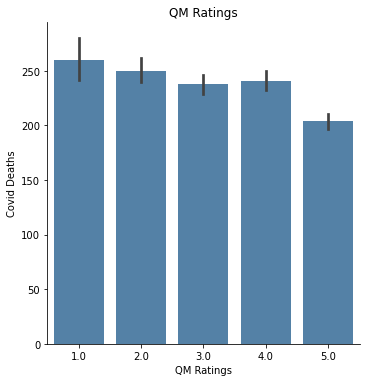

In [16]:
# Visualize best rating 
sns.catplot(x="qm_rating", y="total_deaths_per_1000", kind="bar", data=df2, color='steelblue');
plt.xlabel('QM Ratings');
plt.ylabel('Covid Deaths');
plt.title('QM Ratings');

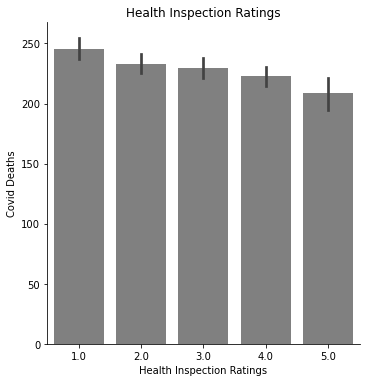

In [19]:
sns.catplot(x="health_inspection_rating", y="total_deaths_per_1000", kind="bar", data=df2, color='grey');
plt.xlabel('Health Inspection Ratings');
plt.ylabel('Covid Deaths');
plt.title('Health Inspection Ratings');

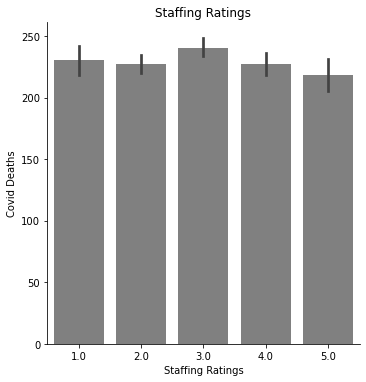

In [20]:
sns.catplot(x="staffing_rating", y="total_deaths_per_1000", kind="bar", data=df2, color='grey');
plt.xlabel('Staffing Ratings');
plt.ylabel('Covid Deaths');
plt.title('Staffing Ratings');

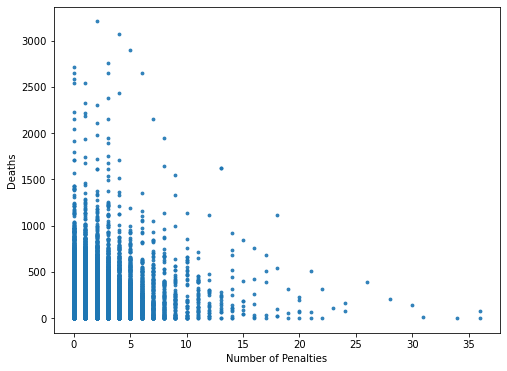

In [14]:
#Look into top 2
plt.figure(figsize=(8,6))
plt.scatter(x=df2["total_number_of_penalties"],y=df2['total_deaths_per_1000'],alpha=0.9, s=8)
plt.xlabel('Number of Penalties')
plt.ylabel('Deaths');

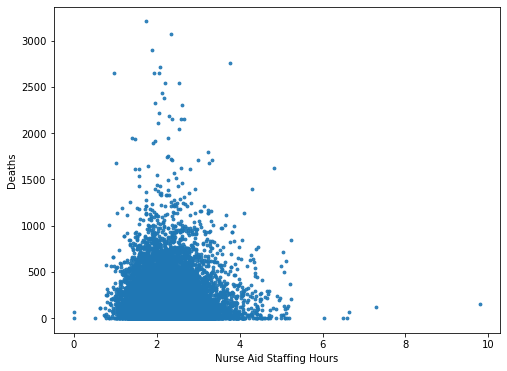

In [15]:
#Look into top 2
plt.figure(figsize=(8,6))
plt.scatter(x=df2['reported_nurse_aide_staffing_hours_per_resident_per_day'],y=df2['total_deaths_per_1000'],alpha=0.9, s=8)
plt.xlabel('Nurse Aid Staffing Hours')
plt.ylabel('Deaths');

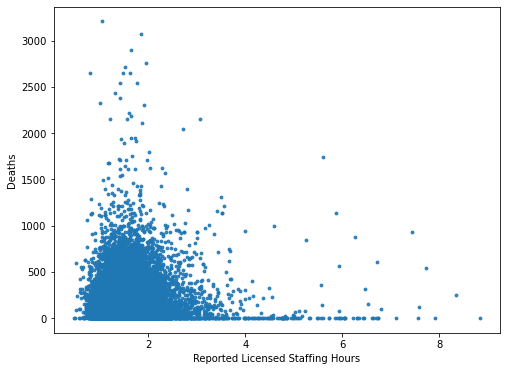

In [16]:
#Look into top 2
plt.figure(figsize=(8,6))
plt.scatter(x=df2["reported_licensed_staffing_hours_per_resident_per_day"],y=df2['total_deaths_per_1000'],alpha=0.9, s=8)
plt.xlabel('Reported Licensed Staffing Hours')
plt.ylabel('Deaths');

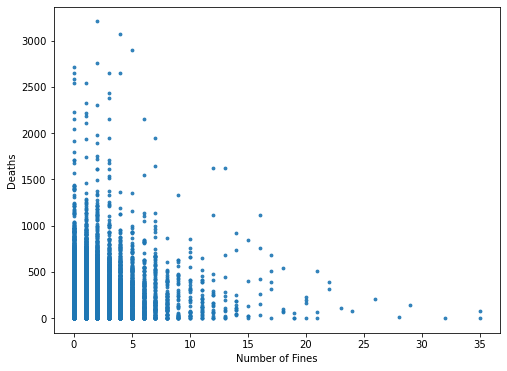

In [17]:
#Look into top 2
plt.figure(figsize=(8,6))
plt.scatter(x=df2["number_of_fines"],y=df2['total_deaths_per_1000'],alpha=0.9, s=8)
plt.xlabel('Number of Fines')
plt.ylabel('Deaths');

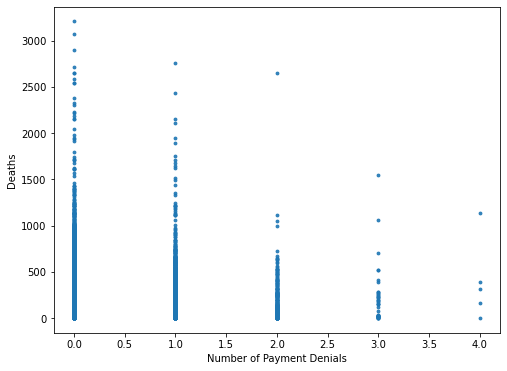

In [18]:
#Look into top 2
plt.figure(figsize=(8,6))
plt.scatter(x=df2["number_of_payment_denials"],y=df2['total_deaths_per_1000'],alpha=0.9, s=8)
plt.xlabel('Number of Payment Denials')
plt.ylabel('Deaths');

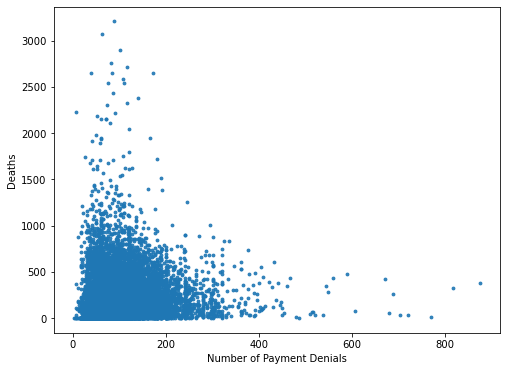

In [26]:
#Look into top 2
plt.figure(figsize=(8,6))
plt.scatter(x=df2["number_of_certified_beds"],y=df2['total_deaths_per_1000'],alpha=0.9, s=8)
plt.xlabel('Number of Payment Denials')
plt.ylabel('Deaths');